In [1]:
##This is a project I've undertaken to check out an API from www.kaggle.com containing data from 
##consumer complaints. I have eliminated many of the companies based on the number of complaints,
##narrowing it down to a 'top ten'. So in order to have made it into my data analysis, you really 
##need to have made a lot of people mad.

In [2]:
#Standard
import numpy as np
import pandas as pd
from numpy.random import randn
#Stats
from scipy import stats
#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#for inline output in iPython Notebook:
%matplotlib inline

/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
cc_df = pd.read_csv('Consumer_Complaints.csv')
cc_df = pd.DataFrame(cc_df)
cc_df.head(15)

/home/cassius/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,01/01/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"Lamont, Hanley & Associates, Inc.",PA,194XX,Web,01/01/2016,Closed with explanation,Yes,Yes,1723490
1,12/31/2015,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company believes it acted appropriately as aut...,"Lamont, Hanley & Associates, Inc.",MA,020XX,Web,12/31/2015,Closed with explanation,Yes,No,1724395
2,12/31/2015,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company can't verify or dispute the facts in t...,Focus Holding Company,AL,36477,Web,12/31/2015,Closed with explanation,Yes,No,1724294
3,12/31/2015,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,NaN,NaN,Navy FCU,GA,30045,Web,12/31/2015,In progress,Yes,No,1723811
4,12/31/2015,Debt collection,Auto,Disclosure verification of debt,Right to dispute notice not received,NaN,NaN,Caine & Weiner Co. Inc.,PA,191XX,Web,12/31/2015,Closed with explanation,Yes,No,1722410
5,12/31/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Communication tactics,Frequent or repeated calls,NaN,Company chooses not to provide a public response,"Mariner Finance, LLC",NC,272XX,Web,12/31/2015,Closed with explanation,Yes,No,1721779
6,12/31/2015,Credit reporting,NaN,Incorrect information on credit report,Personal information,NaN,Company believes complaint caused principally ...,"Credit Karma, Inc.",NY,11735,Web,12/31/2015,Closed with explanation,Yes,No,1722137
7,12/30/2015,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,Transworld Systems Inc.,CA,91436,Web,12/30/2015,In progress,Yes,No,1722179
8,12/30/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Talked to a third party about my debt,NaN,NaN,"RMS-Recovery Management Services, Inc.",VA,22207,Web,12/30/2015,Closed with explanation,Yes,No,1722328
9,12/30/2015,Consumer Loan,Vehicle loan,Taking out the loan or lease,NaN,NaN,NaN,Ally Financial Inc.,TX,770XX,Web,12/30/2015,In progress,Yes,No,1721929


In [4]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501193 entries, 0 to 501192
Data columns (total 16 columns):
Date received                   501193 non-null object
Product                         501193 non-null object
Sub-product                     361520 non-null object
Issue                           501182 non-null object
Sub-issue                       186245 non-null object
Consumer complaint narrative    45191 non-null object
Company public response         57932 non-null object
Company                         501193 non-null object
State                           494489 non-null object
ZIP code                        496577 non-null object
Submitted via                   501193 non-null object
Date sent to company            501193 non-null object
Company response to consumer    501193 non-null object
Timely response?                501193 non-null object
Consumer disputed?              501193 non-null object
Complaint ID                    501193 non-null int64
dtypes: int6

In [5]:
## Grouping by company 
g = cc_df.groupby('Company')

In [6]:
## Figure out the top ten offenders by number of complaints. If you pissed off more than 10,000 
## people, congratulations you're in!
size = g.size()
most_comps = size[size > 10000]
most_comps

Company
Bank of America        53044
Capital One            14398
Citibank               23449
Equifax                27252
Experian               26774
JPMorgan Chase         31192
Nationstar Mortgage    12114
Ocwen                  19759
TransUnion             22013
Wells Fargo            39109
dtype: int64

In [7]:
cc_df = g.filter(lambda x: len(x) > 10000)
cc_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
10,12/30/2015,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,NaN,Company chooses not to provide a public response,Wells Fargo,CA,949XX,Web,12/30/2015,Closed with explanation,Yes,No,1722412
11,12/30/2015,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,Equifax,UT,846XX,Web,12/30/2015,Closed with explanation,Yes,No,1722386
22,12/30/2015,Bank account or service,(CD) Certificate of deposit,"Account opening, closing, or management",NaN,NaN,Company chooses not to provide a public response,Wells Fargo,WA,98498,Referral,12/30/2015,Closed with explanation,Yes,No,1721558
33,12/30/2015,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,Equifax,CA,902XX,Web,12/30/2015,Closed with explanation,Yes,No,1722612
35,12/30/2015,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,Equifax,TX,75249,Phone,12/30/2015,Closed with explanation,Yes,No,1722260


In [8]:
## Cleaning out some unnecessary stuff, stuff we can't really graph anyway. 
cc_df = cc_df.drop(['Sub-product','Company public response','Consumer complaint narrative',
                    'ZIP code','Submitted via','Complaint ID',],axis=1)
cc_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
10,12/30/2015,Bank account or service,"Account opening, closing, or management",NaN,Wells Fargo,CA,12/30/2015,Closed with explanation,Yes,No
11,12/30/2015,Credit reporting,Unable to get credit report/credit score,Problem getting my free annual report,Equifax,UT,12/30/2015,Closed with explanation,Yes,No
22,12/30/2015,Bank account or service,"Account opening, closing, or management",NaN,Wells Fargo,WA,12/30/2015,Closed with explanation,Yes,No
33,12/30/2015,Credit reporting,Improper use of my credit report,Report improperly shared by CRC,Equifax,CA,12/30/2015,Closed with explanation,Yes,No
35,12/30/2015,Credit reporting,Unable to get credit report/credit score,Problem getting report or credit score,Equifax,TX,12/30/2015,Closed with explanation,Yes,No


In [9]:
cc_df.shape

(269104, 10)

In [10]:
## Looks like crummy mortgages were the biggest complaint in 2015. Let's find out who really stood 
## out here... 

In [11]:
cc_df['Product'].value_counts()

Mortgage                   112605
Credit reporting            76275
Credit card                 37157
Bank account or service     28797
Debt collection              6885
Consumer Loan                4319
Student loan                 2161
Money transfers               564
Prepaid card                  181
Other financial service       118
Payday loan                    42
Name: Product, dtype: int64

In [12]:
cc_df.sort_index(by=['Product','Company']).head()
## Ok so now I'm sorted by the company and the product they received complaints on. Now, how to graph
## the companies by the individual product? That way the graphs will be readable and provide some 
## clarity from the data. Right now there are too many products.

/home/cassius/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
405,12/23/2015,Bank account or service,Deposits and withdrawals,NaN,Bank of America,NJ,12/28/2015,In progress,Yes,No
406,12/23/2015,Bank account or service,"Account opening, closing, or management",NaN,Bank of America,NJ,12/28/2015,In progress,Yes,No
822,12/21/2015,Bank account or service,Problems caused by my funds being low,NaN,Bank of America,SC,12/21/2015,In progress,Yes,No
1120,12/19/2015,Bank account or service,Problems caused by my funds being low,NaN,Bank of America,CA,12/19/2015,In progress,Yes,No
1161,12/19/2015,Bank account or service,Deposits and withdrawals,NaN,Bank of America,AL,12/19/2015,In progress,Yes,No


In [13]:
## Okay, now we have a DataFrame with only Mortgage complaints! Let's see who the bad boys really 
## were in this field
mort_df = cc_df[cc_df['Product'] == 'Mortgage']
mort_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
71,12/29/2015,Mortgage,"Loan modification,collection,foreclosure",NaN,Bank of America,NY,12/29/2015,In progress,Yes,No
117,12/29/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,Ocwen,FL,12/29/2015,Closed with explanation,Yes,No
121,12/29/2015,Mortgage,"Loan modification,collection,foreclosure",NaN,Ocwen,TX,12/29/2015,Closed with explanation,Yes,No
124,12/29/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,Ocwen,WI,12/29/2015,Closed with explanation,Yes,Yes
134,12/28/2015,Mortgage,"Application, originator, mortgage broker",NaN,Bank of America,NC,12/28/2015,In progress,Yes,No


In [14]:
mort_df.shape
## My DataFrame shape matches the value_counts above for mortgages...good. 

(112605, 10)

/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


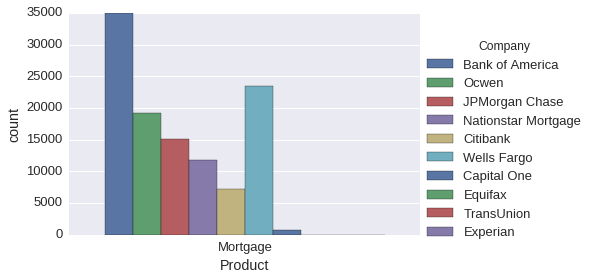

In [15]:
##So here we can see that BofA came in first for mortgages complaints (who knew?) with Wells Fargo
##in a fairly distant second place. Ocwen is third.
##set the font size to something readable:
sns.set_context('notebook', font_scale=1.3, rc={'line.linewidth': 2.5})
sns.factorplot(x='Product',data=mort_df, hue='Company', kind='count',size=4, aspect=1.5,palette="deep")

/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


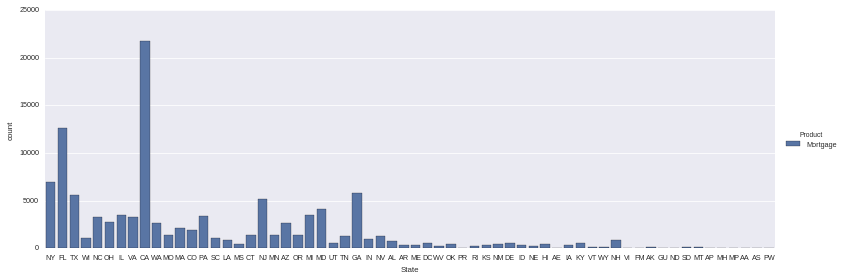

In [16]:
sns.set_context('paper', font_scale=0.9, rc={'line.linewidth': 2.5})
sns.factorplot(x='State',data=mort_df, hue='Product', kind='count',size=4, aspect=2.7,palette="deep")

In [17]:
## Above, we see that California was hit hard, nearly twice as much as Florida which came in second,
## which was twice as much as New York, which takes 3rd place for consumer complaints in the mortgage 
## industry. Wonder if this is due in part to population? Yes but not entirely, since Texas is the 
## second-most populated state, but 5th in complaints. Also, I wonder which state 
## has the abbreviation 'PW'?

In [18]:
mort_df['State'].unique()

array(['NY', 'FL', 'TX', 'WI', 'NC', 'OH', 'IL', 'VA', 'CA', 'WA', 'MO',
       'MA', 'CO', 'PA', 'SC', 'LA', 'MS', 'CT', 'NJ', 'MN', 'AZ', 'OR',
       'MI', 'MD', 'UT', 'TN', 'GA', nan, 'IN', 'NV', 'AL', 'AR', 'ME',
       'DC', 'WV', 'OK', 'PR', 'RI', 'KS', 'NM', 'DE', 'ID', 'NE', 'HI',
       'AE', 'IA', 'KY', 'VT', 'WY', 'NH', 'VI', 'FM', 'AK', 'GU', 'ND',
       'SD', 'MT', 'AP', 'MH', 'MP', 'AA', 'AS', 'PW'], dtype=object)

In [19]:
###...and where the heck is 'GU'??? 
len(mort_df['State'].unique())
###must be some new states that have joined the union unbeknownst to me...or I have a dirty, dirty dataset. 

63

/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


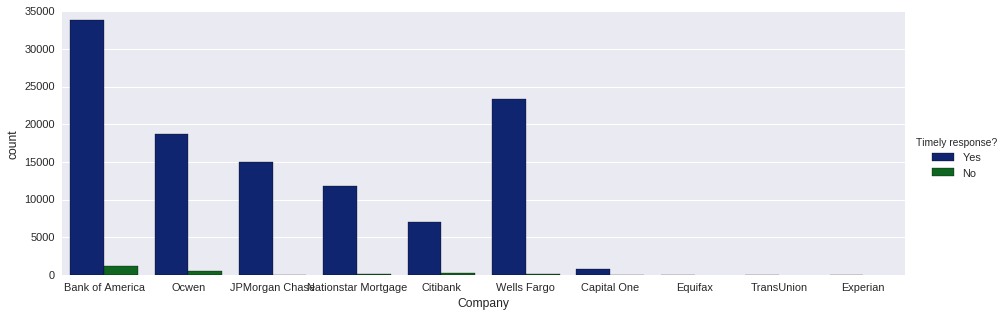

In [20]:
###Well at least most people got a 'timely response'. I just wonder if it was the response they were hoping for...
sns.set_context('notebook', font_scale=1.1, rc={'line.linewidth': 1.5})
sns.factorplot('Company', hue='Timely response?', data=mort_df, kind='count',size=4.5,aspect=2.8,palette="dark")

/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


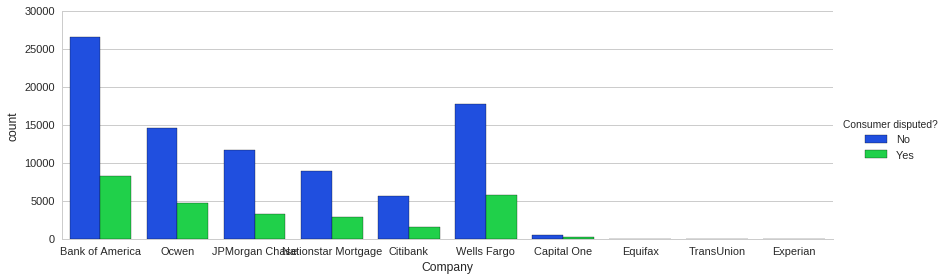

In [21]:
## Kinda figures the top three would have the most consumer-disputed cases, which is 
## borne-out here. I wonder why the clear majority of complaints are labeled as "not 
## consumer disputed", unless that criteria has only to do with the final outcome. 
## In which case, if the data is correct, the companies did a fairly good job at dealing 
## with their complaints. 
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.1, rc={'line.linewidth': 1.5})
sns.factorplot('Company', hue='Consumer disputed?', data=mort_df, kind='count',size=4.0,aspect=2.9,palette="bright")

In [22]:
## So in order to get a view for when the complaints rolled in and for which company, 
## I need to figure out how to rename the dates to years instead of the mm-dd-yyyy format. 
## Without doing this, we'd get data for every day, which is too much to graph.

In [23]:
date = mort_df['Date received']
date.shape

(112605,)

In [24]:
str_date = []

In [25]:
x = []
for d in date:
    n = d[6:11]
    str_date.append(str(n))
str_date[112599:112604]

['2011', '2011', '2011', '2011', '2011']

In [26]:
#Double-checking the length of the list 
len(str_date)

112605

In [27]:
#Pass the list into the mortgage DataFrame
mort_df['year'] = str_date

/home/cassius/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
##Got 'er did. Now to figure out how to graph the data.
mort_df.head()

,Date received,Product,Issue,Sub-issue,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,year
71,12/29/2015,Mortgage,"Loan modification,collection,foreclosure",NaN,Bank of America,NY,12/29/2015,In progress,Yes,No,2015
117,12/29/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,Ocwen,FL,12/29/2015,Closed with explanation,Yes,No,2015
121,12/29/2015,Mortgage,"Loan modification,collection,foreclosure",NaN,Ocwen,TX,12/29/2015,Closed with explanation,Yes,No,2015
124,12/29/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,Ocwen,WI,12/29/2015,Closed with explanation,Yes,Yes,2015
134,12/28/2015,Mortgage,"Application, originator, mortgage broker",NaN,Bank of America,NC,12/28/2015,In progress,Yes,No,2015


In [29]:
###The API only had data from December of 2011, so let's get rid of that year entirely:
mort_df = mort_df[mort_df['year'] != '2011']

/home/cassius/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


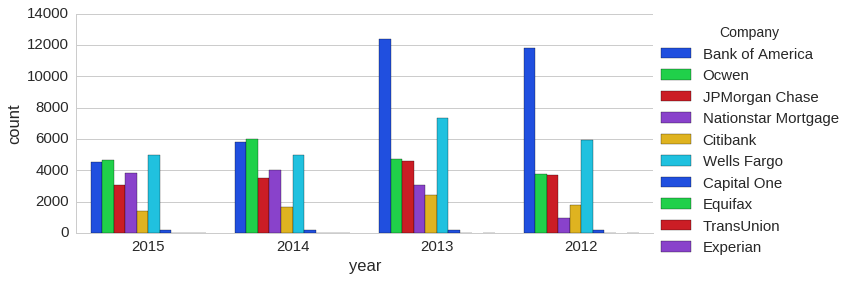

In [30]:
mort_df.groupby('year')
sns.set_context('notebook', font_scale=1.5, rc={'line.linewidth': 1.5})
sns.factorplot('year', hue='Company', data=mort_df, kind='count',size=4,aspect=2.3,palette="bright")

In [31]:
## We can basically say things really got bad in 2012 and 2013 and then things seem 
## to calm down. I wonder if we had some laws get passed at that time that tried to 
## curb some of the most egregious abuses...?